In [0]:
!pip install turicreate==5.4
!pip uninstall -y mxnet
!pip install mxnet-cu100==1.4.0.post0


     |████████████████████████████████| 87.4MB 1.2MB/s 
     |████████████████████████████████| 2.7MB 37.4MB/s 
     |████████████████████████████████| 23.8MB 1.9MB/s 
ERROR: mxnet 1.1.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.16.4 which is incompatible.
ERROR: mxnet 1.1.0.post0 has requirement requests<2.19.0,>=2.18.4, but you'll have requests 2.21.0 which is incompatible.
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Uninstalling mxnet-1.1.0.post0:
  Successfully uninstalled mxnet-1.1.0.post0
     |████████████████████████████████| 487.9MB 35kB/s 
     |████████████████████████████████| 13.8MB 28.9MB/s 
ERROR: turicreate 5.4 requires mxnet<1.2.0,>=1.1.0, which is not installed.
ERROR: spacy 2.1.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: imgaug 0.2.9 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatib

In [0]:
import mxnet as mx
import turicreate as tc

         To fix this, please install the currently recommended version:

             pip uninstall -y mxnet && pip install mxnet==1.1.0

         If you want to use a CUDA GPU, then change 'mxnet' to 'mxnet-cu90' (adjust 'cu90' depending on your CUDA version):



In [0]:
tc.config.set_num_gpus(-1)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
content = tc.load_images('/content/drive/My Drive/content/')
print(content)


+-------------------------------+------------------------+
|              path             |         image          |
+-------------------------------+------------------------+
| /content/drive/My Drive/co... | Height: 450 Width: 600 |
+-------------------------------+------------------------+
[1 rows x 2 columns]



In [0]:
styles = tc.load_images('/content/drive/My Drive/style/')
print(styles)

+-------------------------------+------------------------+
|              path             |         image          |
+-------------------------------+------------------------+
| /content/drive/My Drive/st... | Height: 337 Width: 500 |
| /content/drive/My Drive/st... | Height: 338 Width: 500 |
| /content/drive/My Drive/st... | Height: 330 Width: 500 |
| /content/drive/My Drive/st... | Height: 367 Width: 451 |
| /content/drive/My Drive/st... | Height: 451 Width: 292 |
| /content/drive/My Drive/st... | Height: 309 Width: 451 |
| /content/drive/My Drive/st... | Height: 330 Width: 451 |
| /content/drive/My Drive/st... | Height: 605 Width: 900 |
| /content/drive/My Drive/st... | Height: 634 Width: 900 |
+-------------------------------+------------------------+
[9 rows x 2 columns]



In [0]:
model = tc.style_transfer.create(styles, content)

Using 'image' in style_dataset as feature column and using 'image' in content_dataset as feature column
Setting max_iterations to be 6500
Download completed: /var/tmp/model_cache/resnet-16.params


/usr/local/lib/python3.6/dist-packages/mxnet/gluon/block.py:420: UserWarning: load_params is deprecated. Please use load_parameters.
  warnings.warn("load_params is deprecated. Please use load_parameters.")


Download completed: /var/tmp/model_cache/vgg16-conv1_1-4_3.params
Using GPU to create model (Tesla T4)
Analyzing visual features of the style images
+--------------+--------------+--------------+
| Iteration    | Loss         | Elapsed Time |
+--------------+--------------+--------------+
| 1            | 5.774        | 7.6          |
| 21           | 9.408        | 18.0         |
| 41           | 8.090        | 28.4         |
| 60           | 9.600        | 38.4         |
| 79           | 7.120        | 48.6         |
| 98           | 7.558        | 58.9         |
| 117          | 7.257        | 69.3         |
| 136          | 6.623        | 79.8         |
| 154          | 6.427        | 89.9         |
| 172          | 5.693        | 100.2        |
| 190          | 4.989        | 110.4        |
| 208          | 5.121        | 120.6        |
| 226          | 4.387        | 130.8        |
| 244          | 5.115        | 140.9        |
| 263          | 4.487        | 151.4        |
| 281

In [0]:
from IPython.display import display
from IPython.display import HTML
from PIL import Image
from io import BytesIO
import glob
import random
import base64
import pandas as pd


In [0]:
def image_base64(im):
  if isinstance(im, str):
    im = get_thumbnail(im)
  with BytesIO() as buffer:
    im.save(buffer, 'jpeg')
    return base64.b64encode(buffer.getvalue()).decode()

In [0]:
def tcshow(tcImg):
  from PIL import Image
  from IPython.display import display
  img = Image.fromarray(tcImg.pixel_data)
  display(img)

In [0]:
def preview_images(reference_data, num_previews=30):
  images = list(map(lambda x:image_formatter(get_thumbnail(x)), reference_data[0:num_previews]['path']))
  display(HTML(''.join(images)))

In [0]:
def image_formatter(im):
  return f'<img style="display:inline;margin:1px" src="data:image/jpeg;base64,{image_base64(im)}">'

In [0]:
def get_thumbnail(path):
  i = Image.open(path)
  i.thumbnail((150, 150), Image.LANCZOS)
  return i

In [0]:
stylized_image = model.stylize(content, style=1)


In [0]:
print(stylized_image)

+--------+-------+------------------------+
| row_id | style |     stylized_image     |
+--------+-------+------------------------+
|   0    |   1   | Height: 450 Width: 600 |
+--------+-------+------------------------+
[1 rows x 3 columns]



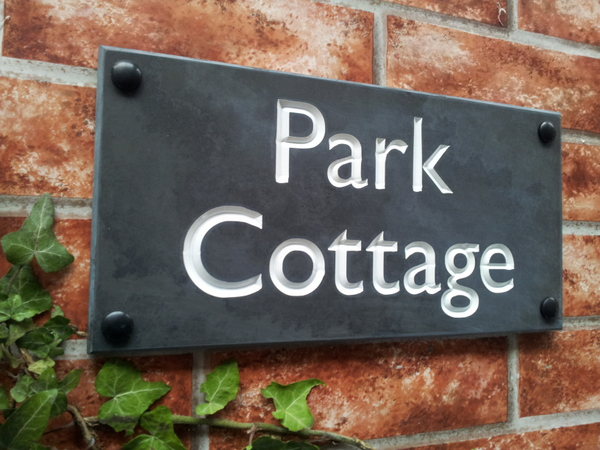

In [0]:
tcshow(content["image"][0])

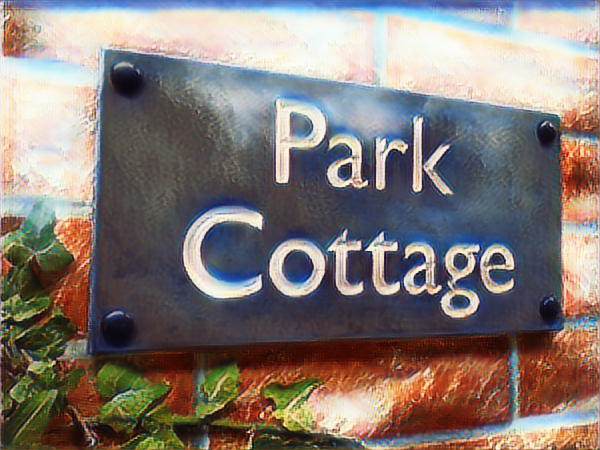

In [0]:
tcshow(stylized_image["stylized_image"][0])

In [0]:
test_images = tc.load_images('/content/drive/My Drive/sample/')


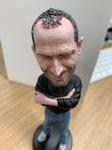

In [0]:
preview_images(test_images)

In [0]:
stylized_images = model.stylize(test_images)
stylized_images

Stylizing 1 image(s) using 9 style(s)
Scaling down 1 image(s) exceeding 800x800
Stylizing 4/9
Stylizing 9/9


row_id,style,stylized_image
0,0,Height: 800 Width: 600
0,1,Height: 800 Width: 600
0,2,Height: 800 Width: 600
0,3,Height: 800 Width: 600
0,4,Height: 800 Width: 600
0,5,Height: 800 Width: 600
0,6,Height: 800 Width: 600
0,7,Height: 800 Width: 600
0,8,Height: 800 Width: 600


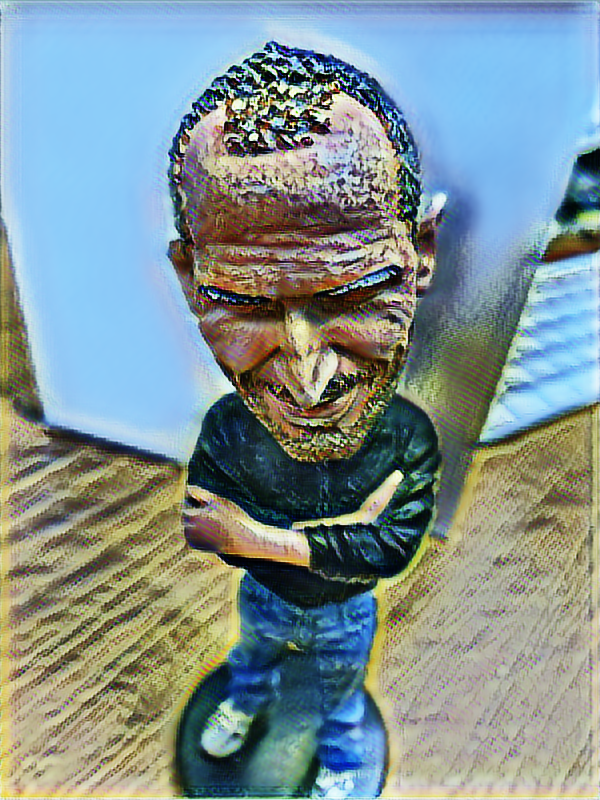

In [0]:
tcshow(stylized_images["stylized_image"][7])

In [0]:
model.export_coreml('MyStyleTransfer.mlmodel')
